In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [12]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

vaini to
tapaua br
port hardy ca
ushuaia ar
hami cn
coihaique cl
mar del plata ar
ilulissat gl
klaksvik fo
chokurdakh ru
caravelas br
atuona pf
villa carlos paz ar
eyl so
kudahuvadhoo mv
avera pf
butaritari ki
bonthe sl
puerto ayora ec
illoqqortoormiut gl
hobart au
port alfred za
kodiak us
avarua ck
vaini to
avarua ck
matagami ca
labytnangi ru
mataura pf
longyearbyen sj
port elizabeth za
tuktoyaktuk ca
albany au
lagoa pt
east london za
quatre cocos mu
puerto ayora ec
bluff nz
fairbanks us
iqaluit ca
ushuaia ar
itaporanga br
punta arenas cl
whitehorse ca
domoni km
tyukalinsk ru
cape town za
ronne dk
grindavik is
mataura pf
warrenton za
orbetello it
lompoc us
port alfred za
rikitea pf
caravelas br
hobart au
mataura pf
guamo co
nabire id
hilo us
busselton au
rikitea pf
albany au
ratnagiri in
hihifo to
tuktoyaktuk ca
jamestown sh
lagoa pt
egvekinot ru
ushuaia ar
taolanaro mg
albany au
luderitz na
albany au
taolanaro mg
khatanga ru
pueblo nuevo pe
punta arenas cl
barrow us
barrow us
college

arraial do cabo br
belushya guba ru
machado br
khatanga ru
hidalgo mx
upernavik gl
half moon bay us
hermanus za
taldan ru
bluff nz
codrington ag
hovd mn
ailigandi pa
indramayu id
skibbereen ie
chkalovskoye ru
bluff nz
castro cl
illoqqortoormiut gl
butaritari ki
troitsko-pechorsk ru
rikitea pf
energeticheskiy kz
punta arenas cl
illoqqortoormiut gl
fare pf
faanui pf
atuona pf
auki sb
punta arenas cl
mrirt ma
rikitea pf
ushuaia ar
rikitea pf
barentsburg sj
punta arenas cl
puerto ayora ec
avarua ck
kapuskasing ca
taolanaro mg
new norfolk au
meadville us
bluff nz
soe id
ushuaia ar
pangkalanbuun id
tsihombe mg
puerto ayora ec
kalmunai lk
cape town za
souillac mu
port hardy ca
sechura pe
ushuaia ar
thompson ca
souillac mu
new norfolk au
ushuaia ar
saint-philippe re
leningradskiy ru
port alfred za
general roca ar
bathsheba bb
lasa cn
kruisfontein za
georgetown sh
zunyi cn
busselton au
burley us
nikolskoye ru
sioux lookout ca
blind river ca
saskylakh ru
souillac mu
rikitea pf
puerto ayora ec
al

cape town za
sitka us
trincomalee lk
tuatapere nz
nueva loja ec
ushuaia ar
mar del plata ar
luceville ca
dingle ie
tura ru
tsihombe mg
luderitz na
alice springs au
russell nz
clyde river ca
rikitea pf
hilo us
castro cl
hobyo so
comarapa bo
broken hill au
suntar ru
namatanai pg
busselton au
ekibastuz kz
nambucca heads au
celestun mx
georgetown sh
antigonish ca
port lincoln au
atuona pf
arraial do cabo br
bandarbeyla so
mantua cu
awallan ph
monterey us
ponnani in
biak id
mana gf
cayenne gf
flinders au
attawapiskat ca
nishihara jp
mar del plata ar
taolanaro mg
nikolskoye ru
port elizabeth za
alofi nu
kruisfontein za
ushuaia ar
sao joao da barra br
beringovskiy ru
new norfolk au
petropavlovsk-kamchatskiy ru
novopokrovka ru
berbera so
busselton au
kamarion gr
hilo us
nyurba ru
nome us
dingle ie
port alfred za
wagar sd
ipixuna br
inderborskiy kz
bengkulu id
faya td
port elizabeth za
cidreira br
atuona pf
yubari jp
suoyarvi ru


In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


610

In [14]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [15]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [41]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
 #   if (i % 50 == 0 and i >= 50):
 #       set_count += 1
 #       record_count = 1
    # Create endpoint URL with each city.
 #   city_url = url + "&q=" + "i"

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
  
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | tapaua
City not found. Skipping...
Processing Record 3 of Set 1 | port hardy
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | hami
Processing Record 6 of Set 1 | coihaique
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | klaksvik
Processing Record 10 of Set 1 | chokurdakh
Processing Record 11 of Set 1 | caravelas
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | villa carlos paz
Processing Record 14 of Set 1 | eyl
Processing Record 15 of Set 1 | kudahuvadhoo
Processing Record 16 of Set 1 | avera
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | bonthe
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 21 of Set 1 | hobart
Processing Record 

Processing Record 39 of Set 4 | santa maria
Processing Record 40 of Set 4 | napierville
Processing Record 41 of Set 4 | pevek
Processing Record 42 of Set 4 | stornoway
Processing Record 43 of Set 4 | villanueva
Processing Record 44 of Set 4 | bengkalis
City not found. Skipping...
Processing Record 45 of Set 4 | puerto leguizamo
Processing Record 46 of Set 4 | grand gaube
Processing Record 47 of Set 4 | tabora
Processing Record 48 of Set 4 | yevlax
Processing Record 49 of Set 4 | gbadolite
Processing Record 50 of Set 4 | guerrero negro
Processing Record 1 of Set 5 | jumla
Processing Record 2 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 3 of Set 5 | tiarei
Processing Record 4 of Set 5 | lata
Processing Record 5 of Set 5 | bathsheba
Processing Record 6 of Set 5 | saint-joseph
Processing Record 7 of Set 5 | macaboboni
City not found. Skipping...
Processing Record 8 of Set 5 | victoria
Processing Record 9 of Set 5 | yerbogachen
Processing Record 10 of Set 

Processing Record 27 of Set 8 | senanga
Processing Record 28 of Set 8 | buala
Processing Record 29 of Set 8 | severo-yeniseyskiy
Processing Record 30 of Set 8 | gazli
Processing Record 31 of Set 8 | andros town
Processing Record 32 of Set 8 | norman wells
Processing Record 33 of Set 8 | pundaguitan
Processing Record 34 of Set 8 | ambon
Processing Record 35 of Set 8 | machado
Processing Record 36 of Set 8 | hidalgo
Processing Record 37 of Set 8 | taldan
Processing Record 38 of Set 8 | hovd
Processing Record 39 of Set 8 | ailigandi
Processing Record 40 of Set 8 | indramayu
Processing Record 41 of Set 8 | skibbereen
Processing Record 42 of Set 8 | chkalovskoye
Processing Record 43 of Set 8 | troitsko-pechorsk
Processing Record 44 of Set 8 | energeticheskiy
Processing Record 45 of Set 8 | fare
Processing Record 46 of Set 8 | mrirt
City not found. Skipping...
Processing Record 47 of Set 8 | kapuskasing
Processing Record 48 of Set 8 | meadville
Processing Record 49 of Set 8 | soe
Processing 

Processing Record 14 of Set 12 | sedelnikovo
City not found. Skipping...
Processing Record 15 of Set 12 | lima
Processing Record 16 of Set 12 | ferrol
Processing Record 17 of Set 12 | tommot
Processing Record 18 of Set 12 | dalvik
Processing Record 19 of Set 12 | bafoulabe
Processing Record 20 of Set 12 | nanortalik
Processing Record 21 of Set 12 | muros
Processing Record 22 of Set 12 | mitchell
Processing Record 23 of Set 12 | praia da vitoria
Processing Record 24 of Set 12 | carutapera
Processing Record 25 of Set 12 | korla
Processing Record 26 of Set 12 | waingapu
Processing Record 27 of Set 12 | talara
Processing Record 28 of Set 12 | trincomalee
Processing Record 29 of Set 12 | nueva loja
Processing Record 30 of Set 12 | luceville
City not found. Skipping...
Processing Record 31 of Set 12 | tura
Processing Record 32 of Set 12 | alice springs
Processing Record 33 of Set 12 | russell
Processing Record 34 of Set 12 | hobyo
Processing Record 35 of Set 12 | comarapa
Processing Record 3

In [42]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.20,-175.20,71.60,94,90,136.90,TO,2020-10-04 15:27:02
1,Port Hardy,50.70,-127.42,55.40,100,90,2.24,CA,2020-10-04 15:27:02
2,Ushuaia,-54.80,-68.30,53.60,80,40,17.22,AR,2020-10-04 15:27:03
3,Hami,42.80,93.45,57.45,29,0,7.94,CN,2020-10-04 15:27:03
4,Coihaique,-45.58,-72.07,53.60,30,0,10.29,CL,2020-10-04 15:27:03
5,Mar Del Plata,-38.00,-57.56,48.20,70,75,13.87,AR,2020-10-04 15:27:03
6,Ilulissat,69.22,-51.10,32.00,88,37,4.70,GL,2020-10-04 15:27:03
7,Klaksvik,62.23,-6.59,57.20,82,100,4.70,FO,2020-10-04 15:27:03
8,Chokurdakh,70.63,147.92,29.28,95,96,14.67,RU,2020-10-04 15:27:03
9,Caravelas,-17.71,-39.25,81.32,61,76,6.69,BR,2020-10-04 15:27:03


In [44]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [45]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [47]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/04/20'

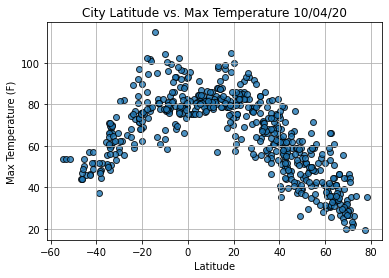

In [48]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

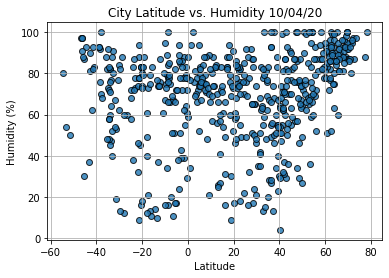

In [49]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

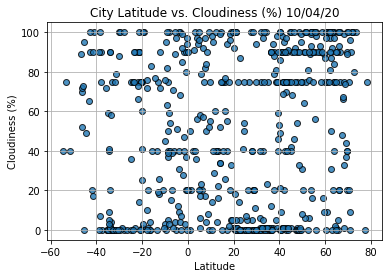

In [50]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

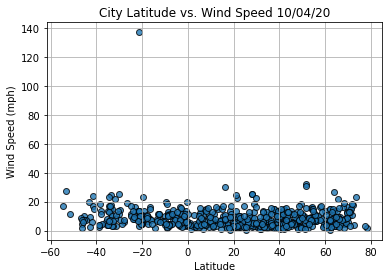

In [51]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()